<a href="https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/wip%2520nbs/04_mnist_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Full Dataset
Model to classify Fashion MNIST

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.4MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 194kB 15.2MB/s 
     |████████████████████████████████| 1.2MB 21.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 248kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Load Fashion MNIST data

Refer to Zolando Research github [repo] (https://github.com/zalandoresearch/fashion-mnist)

| Name                       | Content             | Examples | Size       | Link     |
|----------------------------|---------------------|----------|------------|----------|
| train-images-idx3-ubyte.gz | training set images | 60,000   | 26 MBytes  | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz) |
| train-labels-idx1-ubyte.gz | training set labels | 60,000   | 29 KBytes  | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)
| t10k-images-idx3-ubyte.gz  | test set images     | 10,000   | 4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)
| t10k-labels-idx1-ubyte.gz  | test set labels     | 10,000   | 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)


Label descriptions:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

### Download from repo and handle manually

Fastai utility functions to handle external data: [reference](https://docs.fast.ai/data.external.html)
- `download_url(url, dest, overwrite=False, pbar=None, show_progress=True, chunk_size=1048576, timeout=4, retries=5)`
- `file_extract(fname, dest=None)`
- `untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=file_extract, timeout=4)`

In [ ]:
import os
data_dir = Path('/content/fashion-mnist')
os.makedirs(data_dir, exist_ok=True)
datasets = {'train-images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
            'train-labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
            'test-images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
            'test-labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'
            }

for ds_name, link in datasets.items():
    destination_file = data_dir / f"{ds_name}.gz"
    download_url(url=link, dest=destination_file)

data_dir.ls()

(#4) [Path('/content/fashion-mnist/test-labels.gz'),Path('/content/fashion-mnist/train-labels.gz'),Path('/content/fashion-mnist/test-images.gz'),Path('/content/fashion-mnist/train-images.gz')]

In [ ]:
labels2description = {0: 'T-shirt/top',
                      1: 'Trouser',
                      2: 'Pullover',
                      3: 'Dress',
                      4: 'Coat',
                      5: 'Sandal',
                      6: 'Shirt',
                      7: 'Sneaker',
                      8: 'Bag',
                      9:  'Ankle boot'
                      }

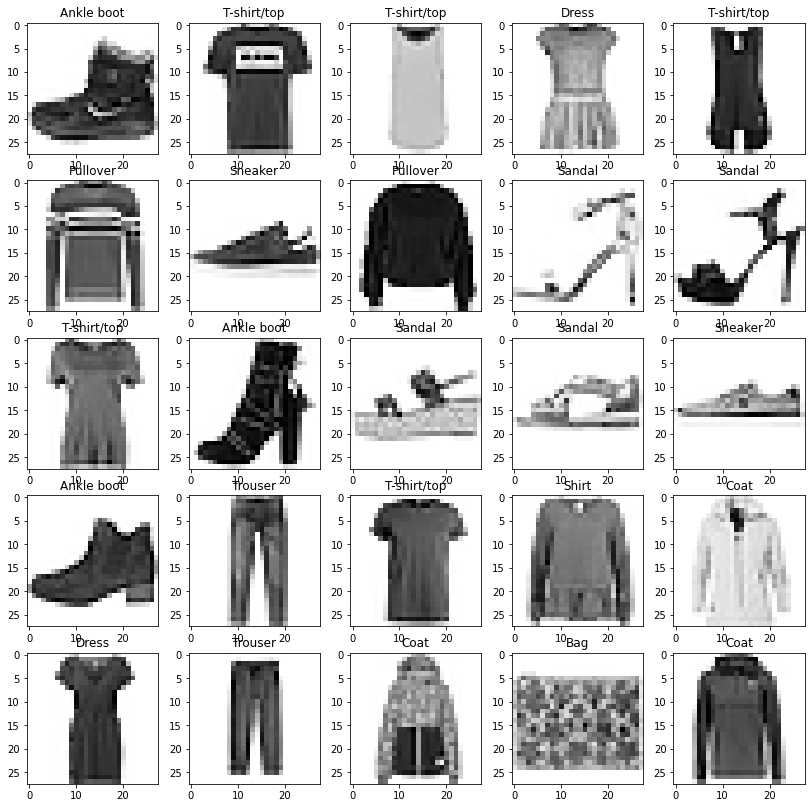

In [ ]:
import gzip

train_test = 'train'
# train_test = 'test'
rows = 5
cols = 5
num_images = rows * cols
image_size = 28

with gzip.open(data_dir/f"{train_test}-images.gz", 'r') as f:
    top = f.read(16)
    buf=f.read(image_size * image_size * num_images)
    images = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    images = images.reshape(num_images, image_size, image_size)

with gzip.open(data_dir/f"{train_test}-labels.gz",'r') as f:
    f.read(8)
    buf=f.read(1 * 8 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 14))
for r in range(rows):
    for c in range(cols):
        idx = r * cols + c
        image = np.asarray(images[idx]).squeeze()
        axs[r, c].imshow(image)
        axs[r, c].set_title(labels2description[labels[idx]])

plt.show()

### Download using PyTorch datasets

PyTorch dataset: [PyTorch reference here](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.FashionMNIST)

``` python
CLASStorchvision.datasets.FashionMNIST(root: str, 
                                       train: bool = True, 
                                       transform: Optional[Callable] = None, 
                                       target_transform: Optional[Callable] = None, 
                                       download: bool = False)
```

Parameters
- `root` (string) – Root directory of dataset where `FashionMNIST/processed/training.pt` and `FashionMNIST/processed/test.pt` exist.
- `train` (bool, optional) – If True, creates dataset from `training.pt`, otherwise from `test.pt`.
- `download` (bool, optional) – If true, downloads the dataset from the internet and puts it in `root` directory. If dataset is already downloaded, it is not downloaded again.
- `transform` (callable, optional) – A function/transform that takes in an `PI`L image and returns a transformed version. E.g, `transforms.RandomCrop`
- `target_transform` (callable, optional) – A function/transform that takes in the target and transforms it.


In [ ]:
from torchvision.datasets.mnist import FashionMNIST
from torch.utils.data import DataLoader as torch_dl

In [ ]:
path2train = Path('/root/.fastai/data/FashionMNIST/train')
path2test = Path('/root/.fastai/data/FashionMNIST/test')
fashion_train = FashionMNIST(root=path2train, train=True, download=True)
fashion_test =  FashionMNIST(root=path2test, train=False, download=True)

Extracting /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.fastai/data/FashionMNIST/train/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)




Extracting /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw


Extracting /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.fastai/data/FashionMNIST/test/FashionMNIST/raw
Processing...
Done!


In [ ]:
display(fashion_train)
display(fashion_test)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.fastai/data/FashionMNIST/train
    Split: Train

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/.fastai/data/FashionMNIST/test
    Split: Test

In [ ]:
# path = Path(fashion_train.root) / 'FashionMNIST'
# Path.BASE_PATH = Path('/root/.fastai/data/FashionMNIST')

In [ ]:
# path2train.ls(), path.ls(), (path/'raw').ls(), (path/'processed').ls()

###  Explore the dataset

In [ ]:
train_images = fashion_train.data
train_labels = fashion_train.targets

test_images = fashion_test.data
test_labels = fashion_test.targets

display(fashion_train.classes)
display(fashion_train.class_to_idx)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [ ]:
train_images.shape, train_labels.shape, len(fashion_train.classes)

(torch.Size([60000, 28, 28]), torch.Size([60000]), 10)

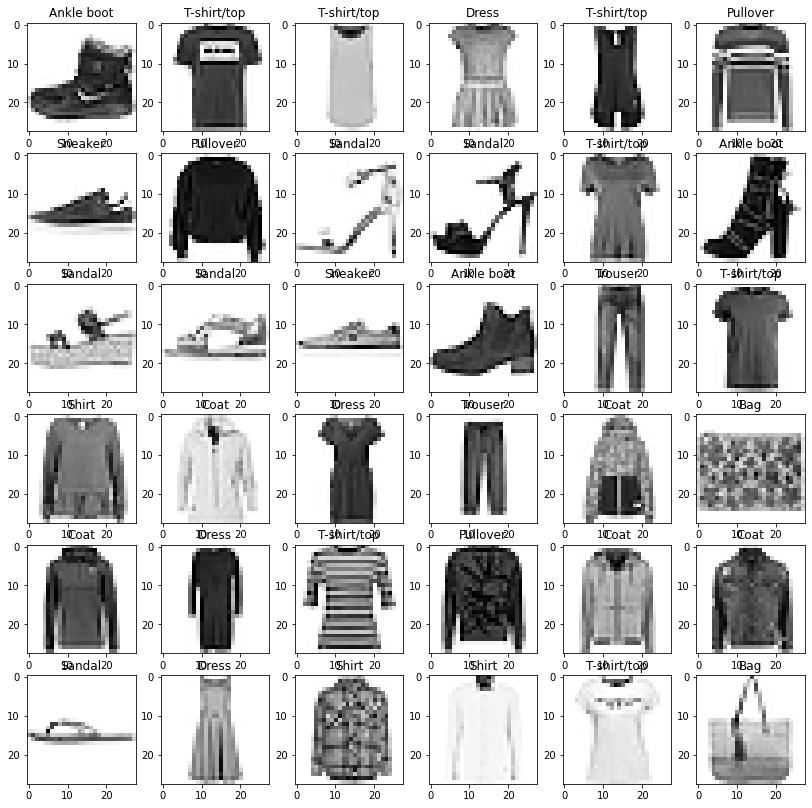

In [ ]:
train_set = True
rows = 6
cols = 6
num_images = rows * cols

images = train_images if train_set else test_images
labels = train_labels if train_set else test_labels

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 14))
for r in range(rows):
    for c in range(cols):
        idx = r * cols + c
        image = np.asarray(images[idx]).squeeze()
        axs[r, c].imshow(image)
        axs[r, c].set_title((fashion_train.classes[int(labels[idx])]))

plt.show()

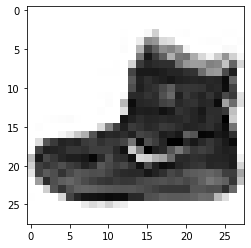

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 1

In [ ]:
img_tnsr = fashion_train.data[0]
plt.imshow(img_tnsr)
plt.show()
display(img_tnsr)

## Create dataset for fastai DataLoader

#### Review tensor formats for image in fastai

##### Color Images

1. Load PETS image datasets 
2. Create a `DataLoaders` using simple factory method with `bs=64` and `Resize(28) to get comparable format as MNIST
2. Extract one batch and review images tensor format

In [ ]:
path_cl = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path_cl, get_image_files(path_cl), 
                                      valid_pct=0.2, seed=42, 
                                      label_func=is_cat, 
                                      item_tfms=Resize(28))

In [ ]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 28, 28]), torch.Size([64]))

Batch tensor is of shape [64, 3, 28, 28]:
- 64 samples
- 3 color channels
- 28 x 28 pixels

Display selection image from the tensor images using `show_image(tensor)

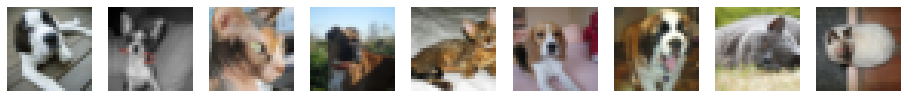

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16,5))
for i, img_tnsr in enumerate(xb[0:9]):
    show_image(img_tnsr, ax=axs[i])

In [ ]:
xb.shape, yb.shape

(torch.Size([64, 3, 28, 28]), torch.Size([64]))

In [ ]:
xb.min(), xb.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

The values are integers from 0 to 255

##### Black and White Images

1. Load MNIST image datasets
2. Create a `DataLoaders` using simple factory method with `bs=64` and from images
2. Extract one batch and review images tensor format

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
dls = ImageDataLoaders.from_folder(path)

In [ ]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 28, 28]), torch.Size([64]))

Even though we have a B&W image, there are still 3 color channels !

In [ ]:
xb.min(), xb.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

Pixel values are integers from 0 to 255

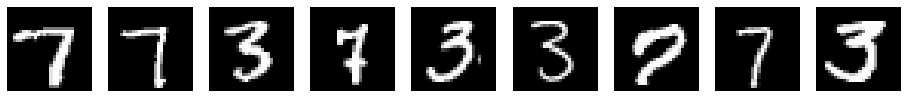

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16,5))
for i, img_tnsr in enumerate(xb[0:9]):
    show_image(img_tnsr, ax=axs[i])

In [ ]:
img_tnsr = xb[0]
img_tnsr.shape

torch.Size([3, 28, 28])

In [ ]:
for i in range(3):
    display(img_tnsr[i].sum())

TensorImage(105.1843, device='cuda:0')

TensorImage(105.1843, device='cuda:0')

TensorImage(105.1843, device='cuda:0')

The three color channels are identical. Color is in shade of grey

The PyTorch dataset only has one channel, i.e. the image tensor has shape `[60000, 28,28]`

fastai ResNet will expect one of the following shapes:
1. [6000, 1, 28, 28] for grayscale images
2. [6000, 3, 28, 28] for rgb images

Options:
1. Transform fastion_train.data into grayscale images for fastai resnet by using `unsqueeze(dim=1) to add one dimension
2. Transform fastion_train.data into rgb images for fastai resnet by using `torch.stack([x, x, x], dim=1) to add one dim and triplacate channels 

#### Reference: how to convert grayscale images (one channel) into rgb image (3 channels)

from grayscale to RGB, we just need to repeat the same values in three channels. Can do this using `torch.stack()`. See documentation [here](https://pytorch.org/docs/stable/generated/torch.stack.html)

First using a single image and random data

In [ ]:
xx = torch.rand(28,28)
y0 =torch.stack([xx,xx,xx],0)
y1 =torch.stack([xx,xx,xx],1)
y2 =torch.stack([xx,xx,xx],2)
print(xx.shape)
print(y0.shape, y1.shape, y2.shape)

torch.Size([28, 28])
torch.Size([3, 28, 28]) torch.Size([28, 3, 28]) torch.Size([28, 28, 3])


Assume a batch of random grayscale images:

torch.Size([6, 28, 28])

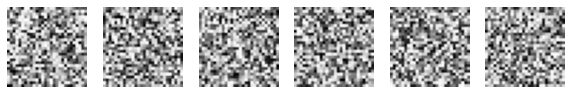

In [ ]:
ds_grayscale = torch.rand(6, 28,28)

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for i, img_tnsr in enumerate(ds_grayscale):
    show_image(img_tnsr, ax=axs[i])

ds_grayscale.shape

In [ ]:
ds_rgb = torch.stack([ds_grayscale, ds_grayscale, ds_grayscale], dim=1)
ds_rgb.shape

torch.Size([6, 3, 28, 28])

torch.Size([6, 3, 28, 28])

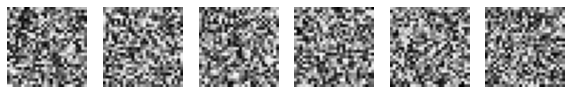

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for i, img_tnsr in enumerate(ds_rgb):
    show_image(img_tnsr, ax=axs[i])

ds_rgb.shape

Same method for a few of the real images from the fashion MNIST

torch.Size([6, 28, 28])

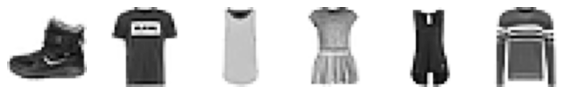

In [ ]:
ds_grayscale = train_images[0:6]

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for i, img_tnsr in enumerate(ds_grayscale):
    show_image(img_tnsr, ax=axs[i])

ds_grayscale.shape

In [ ]:
ds_rgb = torch.stack([ds_grayscale, ds_grayscale, ds_grayscale], dim=1)
ds_rgb.shape

torch.Size([6, 3, 28, 28])

torch.Size([6, 3, 28, 28])

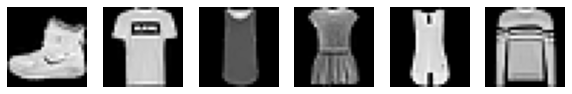

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))
for i, img_tnsr in enumerate(ds_rgb):
    show_image(img_tnsr, ax=axs[i])

ds_rgb.shape

Apply this to the whole dataset:

In [ ]:
train_images.shape, train_labels.shape, len(fashion_train.classes)

(torch.Size([60000, 28, 28]), torch.Size([60000]), 10)

In [ ]:
test_images.shape, test_labels.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

## Prepare data for fastai API

In [ ]:
GRAYSCALE_IMAGES = True

### Option 1: Grayscale images

Convert the PyTorch dataset into a dataset that can be used in DataLoader i.e:
- `dset_train` build from grayscale images (x) and labels (y): `train_x` and `train_y`
- `train_x` as a tensor of shape `[60000, 1, 28, 28]` for grayscale images
- ~~`train_y` as a tensor of shape `[60000, 1]`~~ see notes on errors encountered below.
- `train_y` as a tensor of shape `[60000]`
- `dset_test` is built similarly but has only 10000 samples


PyTorch `CLASStorchvision.datasets.FashionMNIST` returns tensors with other shapes:

```python
    fashion_train.data.shape     -> torch.Size([60000, 28, 28])
    fashion_train.targets.shape  -> torch.Size([60000])
```

- `fashion_train.data` needs to be unsqueezed to add a dimension
- ~~`fashion_train.targets` needs to be unsqueezed to add a dimension~~

In [ ]:
if GRAYSCALE_IMAGES:
    train_x = fashion_train.data.unsqueeze(dim=1) / 255
    train_y = fashion_train.targets

    display(train_x.shape, train_y.shape)
else:
    print('Data prepared using option 2: RGB')

torch.Size([60000, 1, 28, 28])

torch.Size([60000])

In [ ]:
if GRAYSCALE_IMAGES:
    test_x = fashion_test.data.unsqueeze( dim=1) / 255
    test_y = fashion_test.targets

    display(test_x.shape, test_y.shape)
else:
    print('Data prepared using option 2: RGB') 

torch.Size([10000, 1, 28, 28])

torch.Size([10000])

### Option 2: RGB images

Convert the PyTorch dataset into a dataset that can be used in DataLoader i.e:
- `dset_train` build from images (x) and labels (y): `train_x` and `train_y`
- `train_x` as a tensor of shape `[60000, 3, 28, 28]`
- ~~`train_y` as a tensor of shape `[60000, 1]`~~ see notes below.
- `train_y` as a tensor of shape `[60000]`
- `dset_test` is built similarly but has only 10000 samples


PyTorch `CLASStorchvision.datasets.FashionMNIST` returns tensors with other shapes:

```python
    fashion_train.data.shape     -> torch.Size([60000, 28, 28])
    fashion_train.targets.shape  -> torch.Size([60000])
```

- `fashion_train.data` needs to be stacked to create 3 channels.
- ~~`fashion_train.targets` needs to be unsqueezed to add a dimension~~

In [ ]:
if not GRAYSCALE_IMAGES:
    tnsr = fashion_train.data
    train_x = torch.stack([tnsr, tnsr, tnsr], dim=1) / 255
    # train_y = fashion_train.targets.unsqueeze(dim=1)   # Not required to unsqueeze
    train_y = fashion_train.targets

    display(train_x.shape, train_y.shape)
else:
    print('Data prepared using option 1: grayscale')

Data prepared using option 1: grayscale


In [ ]:
if not GRAYSCALE_IMAGES:
    tnsr = fashion_test.data
    test_x = torch.stack([tnsr, tnsr, tnsr], dim=1) / 255
    # test_y = fashion_test.targets.unsqueeze(dim=1) 
    test_y = fashion_test.targets

    display(test_x.shape, test_y.shape)
else:
    print('Data prepared using option 1: grayscale')

Data prepared using option 1: grayscale


## Create training dataset

In [ ]:
dset_train = list(zip(train_x,train_y))

img, y = dset_train[0]
img.shape, y.shape, y

(torch.Size([1, 28, 28]), torch.Size([]), tensor(9))

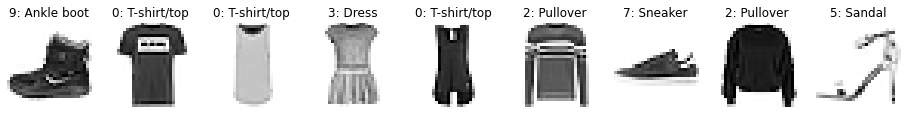

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16,5))

for i, (img_tnsr, y) in enumerate(dset_train[0: 9]):
    show_image(img_tnsr, ax=axs[i], title=f"{y.item()}: {fashion_train.classes[y]}")

## Create validation dataset

In [ ]:
dset_valid = list(zip(test_x, test_y))

img, y = dset_valid[0]
img.shape, y.shape, y

(torch.Size([1, 28, 28]), torch.Size([]), tensor(9))

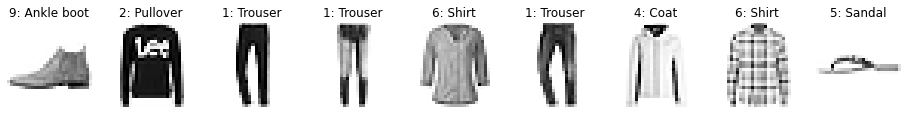

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16,5))

for i, (img_tnsr, y) in enumerate(dset_valid[0: 9]):
    show_image(img_tnsr, ax=axs[i], title=f"{y.item()}: {fashion_test.classes[y]}")

## Create DataLoaders

In [ ]:
# display(len(dset_train), len(dset_valid))

dl_train = DataLoader(dataset=dset_train, bs=256)
dl_valid = DataLoader(dataset=dset_valid, bs=256)  # Note: do not forget to set the bs here too

dls = DataLoaders(dl_train, dl_valid)

In [ ]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

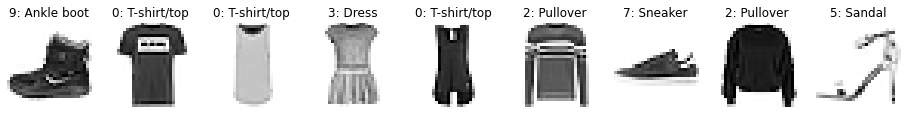

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16,5))
for i, img_tnsr in enumerate(xb[0:9]):
    show_image(img_tnsr, ax=axs[i], title=f"{yb[i].item()}: {fashion_train.classes[yb[i]]}")

In [ ]:
[fashion_train.classes[y] for y in yb[0:9]]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal']

In [ ]:
dls.c = len(fashion_train.classes)

## Learner

In [ ]:
if GRAYSCALE_IMAGES:
    # Option 1: grayscale images. Need to add n_in=1
    learn = cnn_learner(dls, resnet18, pretrained=False,
                        loss_func=F.cross_entropy, metrics=accuracy,
                        n_in=1)
else:
    # Option 2: rgb images. Keep default value of n_in or set to 3
    learn = cnn_learner(dls, resnet18, pretrained=False,
                        loss_func=F.cross_entropy, metrics=accuracy,
                        n_in=3)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0002290867705596611)

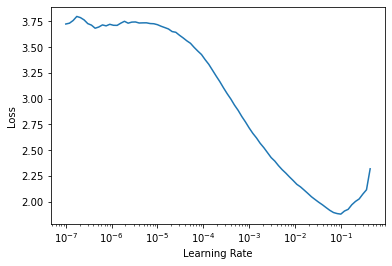

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(n_epoch=5, lr_max=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.566898,0.524991,0.819500,09:10
1,0.364452,0.371729,0.867100,09:04
2,0.292597,0.337923,0.884200,08:59
3,0.223654,0.282809,0.897600,08:59
4,0.149312,0.269286,0.907200,09:00


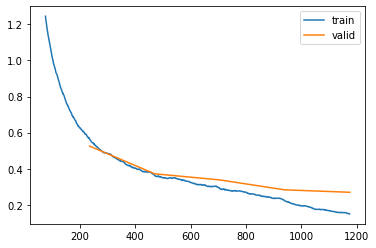

In [ ]:
learn.recorder.plot_loss(skip_start=75)

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
# interp.plot_confusion_matrix(figsize=(8,8))

In [ ]:
# interp.most_confused()

In [ ]:
# interp.plot_top_losses(k=36, figsize=(12,12))

## Summary of errors encountered

### Error: unable to define n_out = number classes 
Create the learning with resnet creates an error:

```python
    learn = cnn_learner(dls, resnet18, pretrained=False,
                        loss_func=F.cross_entropy, metrics=accuracy)

    ---------------------------------------------------------------------------
    AssertionError                            Traceback (most recent call last)
    <ipython-input-68-afb81675e55e> in <module>()
        1 learn = cnn_learner(dls, resnet18, pretrained=False,
    ----> 2                     loss_func=F.cross_entropy, metrics=accuracy)

    /usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py in cnn_learner(dls, arch, normalize, n_out, pretrained, config, loss_func, opt_func, lr, splitter, cbs, metrics, path, model_dir, wd, wd_bn_bias, train_bn, moms, **kwargs)
        177 
        178     if n_out is None: n_out = get_c(dls)
    --> 179     assert n_out, "`n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`"
        180     model = create_cnn_model(arch, n_out, pretrained=pretrained, **kwargs)
        181 

    AssertionError: `n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`
```

Info passed to dls is not enough to define the number of classes (`dls.c`). Need to pass the value (that is the number of classes). This is the number of unique values in the train_label tensor. Also could simply set n_out.

See code [here](https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L160)

### Error: pixel value must be floats between 0 and 1
Image tensor must use float and not int or bytes. If image is int from 0 to 255, then devide by 255.
If not done, it leads to the following runtime error with fitting:

```python
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-193-d81c6bd29d71> in <module>()
----> 1 learn.lr_find()

18 frames
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py in _conv_forward(self, input, weight)
    418                             _pair(0), self.dilation, self.groups)
    419         return F.conv2d(input, weight, self.bias, self.stride,
--> 420                         self.padding, self.dilation, self.groups)
    421 
    422     def forward(self, input: Tensor) -> Tensor:

RuntimeError: expected scalar type Byte but found Float
```

### Error: Wrong format for the target tensor/ y tensor
Single class classifier
Target/Y must be of dimension 1, that means that the shape is [60000] and not [60000, 1]

If target tensor has a shape of [xxxx, 1], it will generate the following error at runtime:

```python
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-132-d81c6bd29d71> in <module>()
----> 1 learn.lr_find()

13 frames
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py in nll_loss(input, target, weight, size_average, ignore_index, reduce, reduction)
   2262                          .format(input.size(0), target.size(0)))
   2263     if dim == 2:
-> 2264         ret = torch._C._nn.nll_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index)
   2265     elif dim == 4:
   2266         ret = torch._C._nn.nll_loss2d(input, target, weight, _Reduction.get_enum(reduction), ignore_index)

RuntimeError: 1D target tensor expected, multi-target not supported
```

### Error: image tensors misformated

Error generated with image tensor was not prepared properly and the learner was not well configured:
- train_x had a shape of [6000,28,28]
- learner not configured to have only 1 channel `n_in` as default value 3
Generated the following error upint runtime when fitting

```python
    learn = cnn_learner(dls, resnet18, pretrained=False,
                        loss_func=F.cross_entropy, metrics=accuracy)
    ---------------------------------------------------------------------------
    RuntimeError                              Traceback (most recent call last)
    <ipython-input-96-244f6d20b917> in <module>()
    ----> 1 learn.fit_one_cycle(1, 0.1)

    18 frames
    /usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py in _conv_forward(self, input, weight)
        418                             _pair(0), self.dilation, self.groups)
        419         return F.conv2d(input, weight, self.bias, self.stride,
    --> 420                         self.padding, self.dilation, self.groups)
        421 
        422     def forward(self, input: Tensor) -> Tensor:

    RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 7, 7], but got 2-dimensional input of size [256, 784] instead
```

ResNet expects color images, that is tensors with three components. 

Tensor shape for ta minibatch (bs=256) tensor is [256, 784] that is 256 images of flattened 28 x 28 pixels. But ResNet expects images with thre color components, and therefore, it ??????



### Error: Wrong `n_in`, not corresponding to the nrb of channels
By default, ResNet expects RGB images (3 channels). 

When usin grayscale images (1 channel), the parameter `n_in` must be set when creating the learner with `cnn_learner`:
```python
    learn = cnn_learner(dls, resnet18, pretrained=False,
                        loss_func=F.cross_entropy, metrics=accuracy,
                        n_in=1)
```
Otherwise it will generate an error message.

See [source code](https://github.com/fastai/fastai/blob/82337bef6a83d4028b44315eed1ff548ac1bc861/fastai/vision/learner.py#L139)


Our images are B&W, so there is only one color channel. We need to pass that info to the cnn_learner factory function as `n_in = 1` because the default value is for color images, that is `n_in = 3`. See source code [here](https://github.com/fastai/fastai/blob/82337bef6a83d4028b44315eed1ff548ac1bc861/fastai/vision/learner.py#L139).

If not done, will get the followin error message upon execution:

``` python
    ---------------------------------------------------------------------------
    RuntimeError                              Traceback (most recent call last)
    <ipython-input-150-244f6d20b917> in <module>()
    ----> 1 learn.fit_one_cycle(1, 0.1)

    18 frames
    /usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py in _conv_forward(self, input, weight)
        418                             _pair(0), self.dilation, self.groups)
        419         return F.conv2d(input, weight, self.bias, self.stride,
    --> 420                         self.padding, self.dilation, self.groups)
        421 
        422     def forward(self, input: Tensor) -> Tensor:

    RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead
```

# ResNet 18 architecture:

<img src="https://raw.githubusercontent.com/vtecftwy/fastbook/master/images/img_resnet18.png">

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Layer 1:
```
Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
```

[reference](https://pytorch.org/docs/stable/nn.html)

Search in the modules:

```python
learn.named_modules?

-------------------------------------------------------------------------------------------------------
Signature: learn.named_modules(memo: Union[Set[ForwardRef('Module')], NoneType]=None, prefix: str='')
Docstring:
Returns an iterator over all modules in the network, yielding
both the name of the module as well as the module itself.

Yields:
    (string, Module): Tuple of name and module

Note:
    Duplicate modules are returned only once. In the following
    example, ``l`` will be returned only once.

Example::

    >>> l = nn.Linear(2, 2)
    >>> net = nn.Sequential(l, l)
    >>> for idx, m in enumerate(net.named_modules()):
            print(idx, '->', m)

    0 -> ('', Sequential(
      (0): Linear(in_features=2, out_features=2, bias=True)
      (1): Linear(in_features=2, out_features=2, bias=True)
    ))
    1 -> ('0', Linear(in_features=2, out_features=2, bias=True))
```

In [ ]:
[(x, y) for x,y in learn.named_modules()][2]

('0.0',
 Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False))

In [ ]:
txt, m = [(x, y) for x,y in learn.named_modules()][2]

In [ ]:
m.kernel_size, m.stride, m.padding, m.bias, m.dilation, m.groups, m.bias, m.padding_mode

((7, 7), (2, 2), (3, 3), None, (1, 1), 1, None, 'zeros')

# OLD CODE

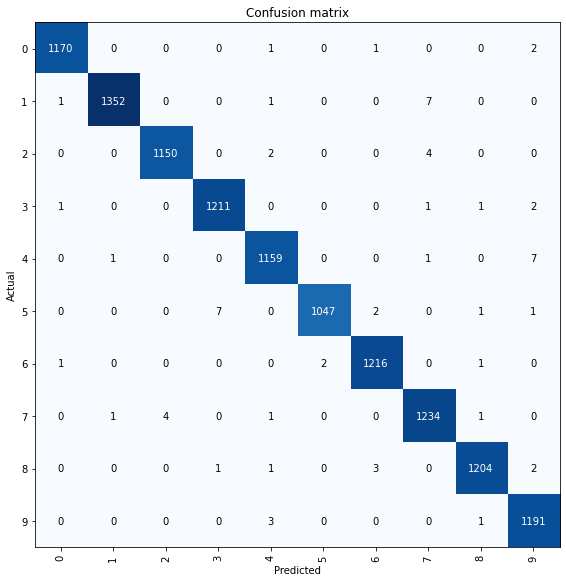

In [ ]:
interp_34_unt = ClassificationInterpretation.from_learner(learn_34_unt)
interp_34_unt.plot_confusion_matrix(figsize=(8,8))

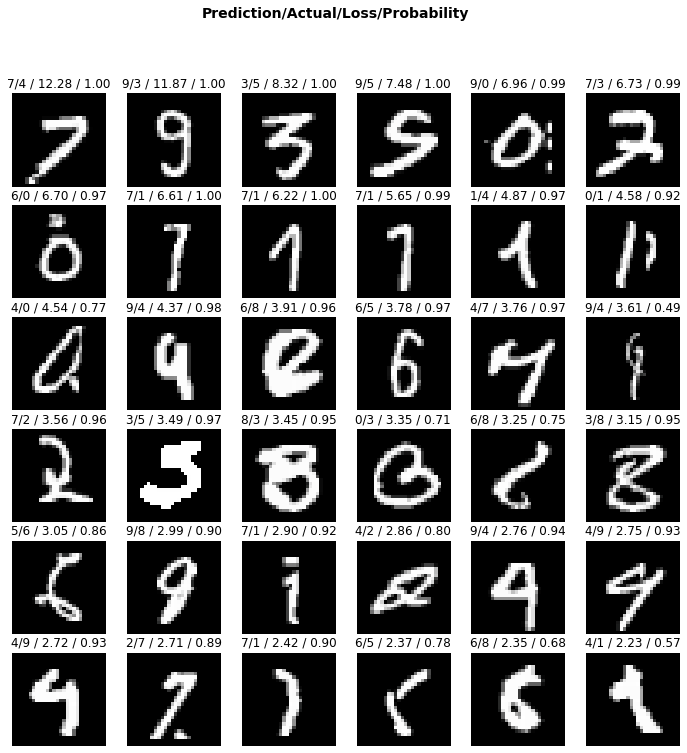

In [ ]:
# interp_34_unt.most_confused()
interp_34_unt.plot_top_losses(k=36, figsize=(12,12))